Rlab 4.0 attached.



Adjuntando el paquete: 'Rlab'


The following objects are masked from 'package:stats':

    dexp, dgamma, dweibull, pexp, pgamma, pweibull, qexp, qgamma,
    qweibull, rexp, rgamma, rweibull


The following object is masked from 'package:datasets':

    precip


Cargando paquete requerido: usethis


Adjuntando el paquete: 'dplyr'


The following object is masked from 'package:Rlab':

    count


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Cargando paquete requerido: reshape2



[1] "/Users/usuario/Downloads"

Boolean network with 13 genes

Involved genes:
AG AP1 AP2 AP3 EMF1 FT FUL LFY PI SEP TFL1 UFO WUS

Transition functions:
AG = (!EMF1 & !TFL1 & !AP2) | (!EMF1 & LFY & !AP1) | (!EMF1 & !AP2 & LFY) | (!EMF1 & !TFL1 & LFY & (AG & SEP)) | (!EMF1 & (LFY & WUS))
AP1 = (!AG & !TFL1) | (FT & LFY &!AG) | (FT & !AG & !PI) | (LFY & !AG & !PI) | (FT & !AG & !AP3) | (LFY & !AG & !AP3)
AP2 = !TFL1
AP3 = (LFY & UFO) | (PI & SEP & AP3 & (AG | AP1))
EMF1 = !LFY
FT = !EMF1
FUL = !AP1 & !TFL1
LFY = !EMF1 | !TFL1
PI = (LFY & (AG | AP3)) | (PI & SEP & AP3 & (AG | AP1))
SEP = LFY
TFL1 = !AP1 & (EMF1 & !LFY)
UFO = UFO
WUS = WUS & (!AG | !SEP)
Attractor 1 is a simple attractor consisting of 1 state(s) and has a basin of 2970 state(s):

 |--<------------|
 V               |
 1010011111000   |
 V               |
 |-->------------|


Genes are encoded in the following order: AG AP1 AP2 AP3 EMF1 FT FUL LFY PI SEP TFL1 UFO WUS

Attractor 2 is a simple attractor consisting of 1 state(s) and has a basin of 812 state(

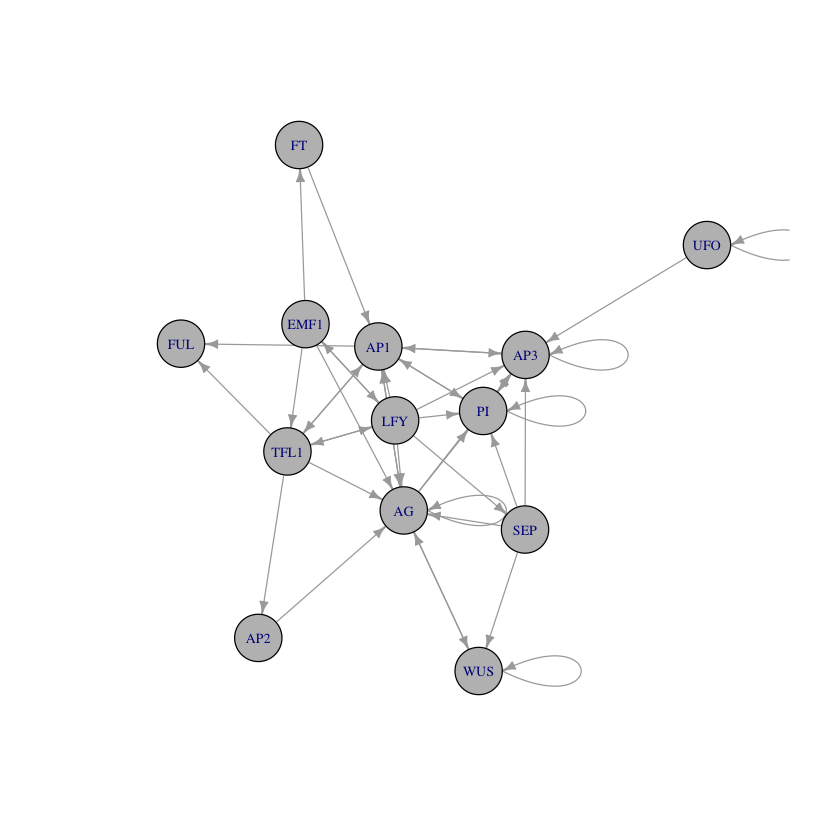

,Attr1.1,Attr2.1,Attr3.1,Attr4.1,Attr5.1,Attr6.1,Attr7.1,Attr8.1,Attr9.1,Attr10.1
AG,1,0,1,0,0,1,0,0,0,0
AP1,0,1,0,1,0,0,1,0,0,0
AP2,1,1,1,1,0,1,1,0,0,0
AP3,0,0,1,1,0,1,1,0,0,0
EMF1,0,0,0,0,1,0,0,1,1,1
FT,1,1,1,1,0,1,1,0,0,0
FUL,1,0,1,0,0,1,0,0,0,0
LFY,1,1,1,1,0,1,1,0,0,0
PI,1,0,1,1,0,1,1,0,0,0
SEP,1,1,1,1,0,1,1,0,0,0


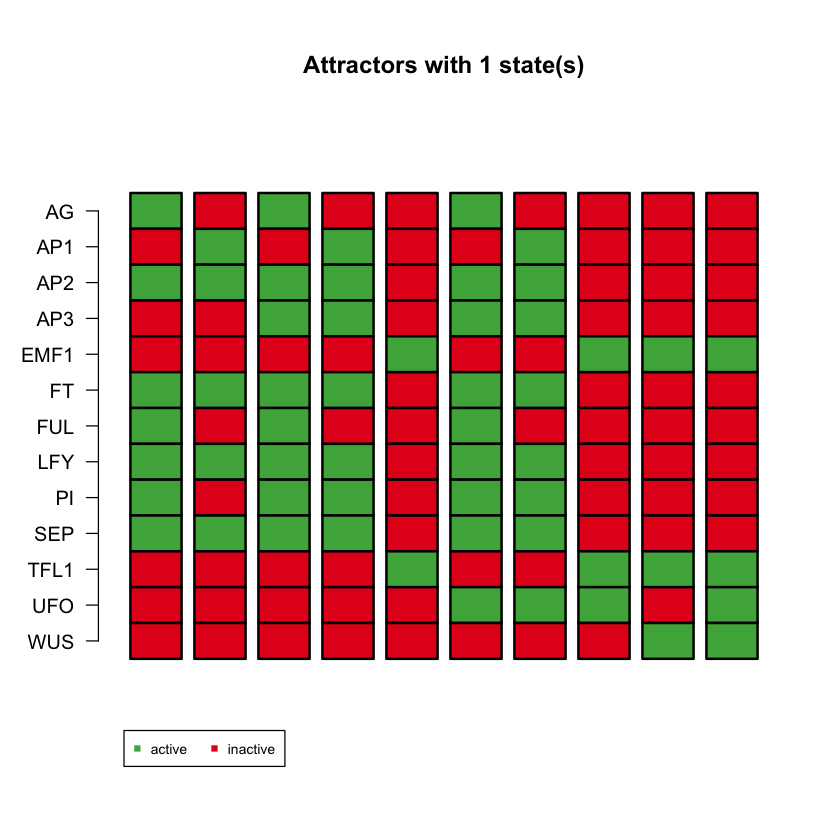

In [4]:
# Practica: Redes booleanas estocasticas
# Nombre: Biologia de sistemas EAFIT
# .rs.restartR()
#######################################################

# Cargar librerías necesarias
library(Rlab)
library(BoolNet)
library(BoolFilter)
library(devtools)
library(dplyr)
library(BoolNetPerturb)

# Definir el directorio de trabajo (opcional, cambiar según ubicación de archivos)
#setwd("ruta/del/directorio")
getwd()

###########################################################
# Parte 1: Cargar la red y visualizar los atractores

# Cargar la red del archivo de Arabidopsis
net <- loadNetwork("/Volumes/16GB/redes_booleanas/ejemplo_class1paper_estocasticas/ATH_flower_cell_fate_determination_net.txt")

# Visualizar la red
plotNetworkWiring(net)
print(net)

# Obtener atractores de la red
a <- getAttractors(net)
print(a)

# Graficar atractores
plotAttractors(a)

    [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [37] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [73] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [109] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [145] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [181] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [217] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [253] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [289] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [325] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [361] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [397] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [433] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

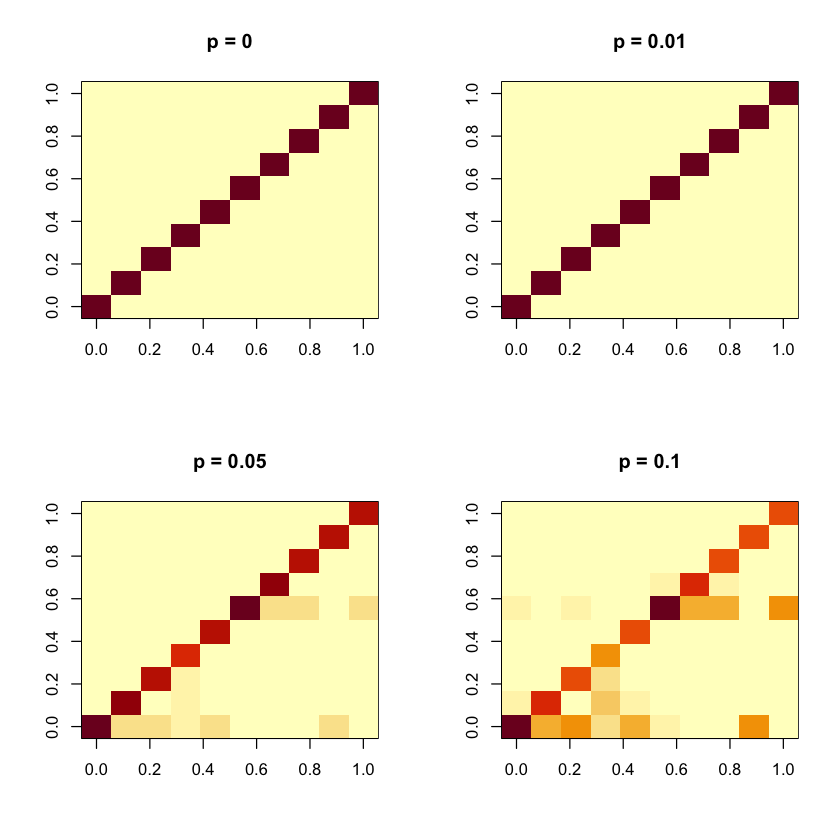

In [5]:
###########################################################
# Parte 2: Análisis de la matriz de transición de Márkov

# Definir niveles de ruido
p_values <- c(0, 0.01, 0.05, 0.1)
landscapes <- lapply(p_values, function(p) epigeneticLandscape(net, p))
names(landscapes) <- paste0("p=", p_values)

# Verificar la estructura de los objetos generados
str(landscapes)

# Primer conjunto de gráficos (con conversión explícita)
par(mfrow = c(2,2))
for (p in p_values) {
  landscape_matrix <- as.matrix(landscapes[[paste0("p=", p)]])
  image(landscape_matrix, main = paste("p =", p))
}

# Visualizar matrices de Márkov (interactivo, solo si usas RStudio)
# lapply(landscapes, View)

# Segundo conjunto de gráficos (corregido: conversión añadida)
par(mfrow = c(2,2))
for (p in p_values) {
  landscape_matrix <- as.matrix(landscapes[[paste0("p=", p)]])  # Conversión crítica
  image(landscape_matrix, main = paste("p =", p))
}

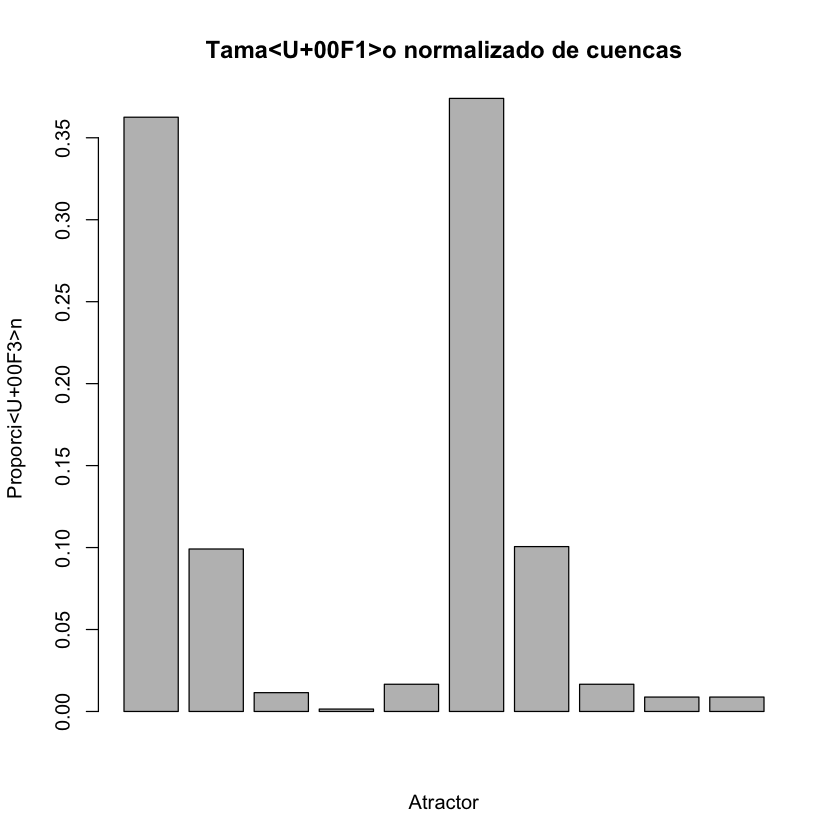

In [6]:
###########################################################
# Parte 3: Análisis de tamaños de cuencas de atracción

# Extraer tamaños de cuencas
tam_cuenca <- sapply(a$attractors, function(x) x$basinSize)

# Normalizar tamaños de cuencas respecto a 2^n variables
n <- length(net$genes)
tam_cuenca_norm <- tam_cuenca / (2^n)

# Graficar distribución de tamaños de cuencas
barplot(tam_cuenca_norm, main="Tamaño normalizado de cuencas", xlab="Atractor", ylab="Proporción")


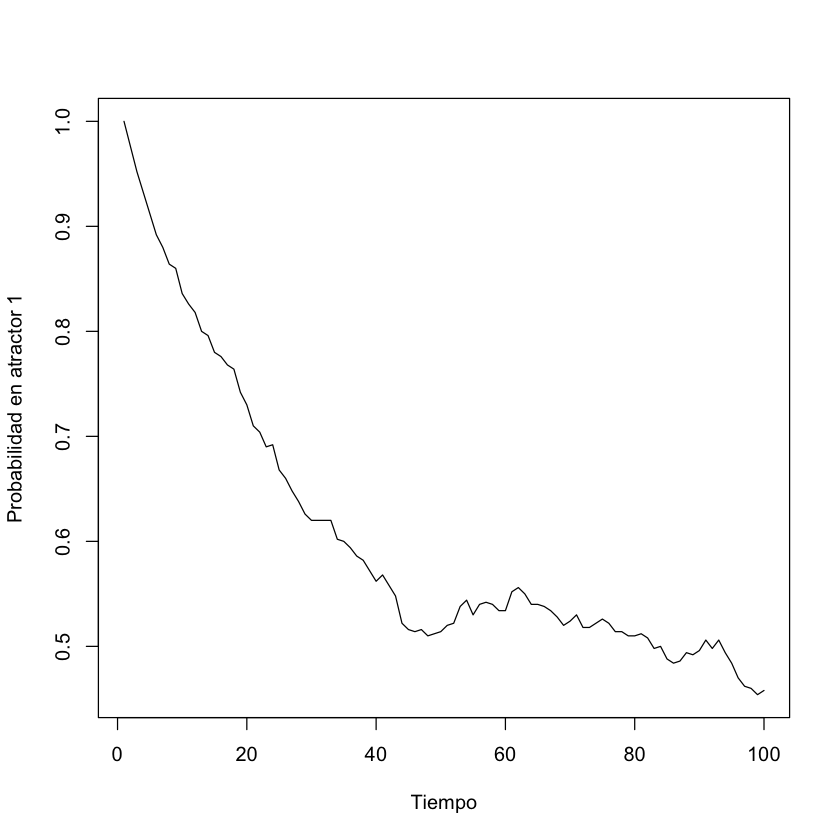

In [7]:
###########################################################
# Parte 4: Simulación de transiciones con Márkov

# Simular transiciones usando la matriz de Márkov
P <- as.matrix(landscapes[["p=0.01"]])
Nsteps <- 100
pi0 <- rep(0, length(a$attractors))
pi0[1] <- 1 # Iniciar en atractor 1

V <- matrix(0, nrow=500, ncol=Nsteps)
V[,1] <- 1 # Comenzamos en atractor 1

for (i in 2:Nsteps) {
  V[,i] <- sapply(V[,i-1], function(v) sample(1:length(a$attractors), 1, prob=P[v,]))
}

# Graficar evolución de probabilidad de estar en el atractor 1
prob_atractor_1 <- colMeans(V == 1)
plot(seq(1, Nsteps), prob_atractor_1, type="l", xlab="Tiempo", ylab="Probabilidad en atractor 1")


Attractor 1 is a simple attractor consisting of 1 state(s) and has a basin of 2920 state(s):

 |--<------------|
 V               |
 1010011111000   |
 V               |
 |-->------------|


Genes are encoded in the following order: AG AP1 AP2 AP3 EMF1 FT FUL LFY PI SEP TFL1 UFO WUS

Attractor 2 is a simple attractor consisting of 1 state(s) and has a basin of 846 state(s):

 |--<------------|
 V               |
 0110010101000   |
 V               |
 |-->------------|


Genes are encoded in the following order: AG AP1 AP2 AP3 EMF1 FT FUL LFY PI SEP TFL1 UFO WUS

Attractor 3 is a simple attractor consisting of 1 state(s) and has a basin of 94 state(s):

 |--<------------|
 V               |
 1111010111000   |
 V               |
 |-->------------|


Genes are encoded in the following order: AG AP1 AP2 AP3 EMF1 FT FUL LFY PI SEP TFL1 UFO WUS

Attractor 4 is a simple attractor consisting of 1 state(s) and has a basin of 28 state(s):

 |--<------------|
 V               |
 0111010111000   |

,Attr1.1,Attr2.1,Attr3.1,Attr4.1,Attr5.1,Attr6.1,Attr7.1,Attr8.1,Attr9.1,Attr10.1
AG,1,0,1,0,0,1,0,0,0,0
AP1,0,1,1,1,0,1,1,0,0,0
AP2,1,1,1,1,0,1,1,0,0,0
AP3,0,0,1,1,0,1,1,0,0,0
EMF1,0,0,0,0,1,0,0,1,1,1
FT,1,1,1,1,0,1,1,0,0,0
FUL,1,0,0,0,0,0,0,0,0,0
LFY,1,1,1,1,0,1,1,0,0,0
PI,1,0,1,1,0,1,1,0,0,0
SEP,1,1,1,1,0,1,1,0,0,0


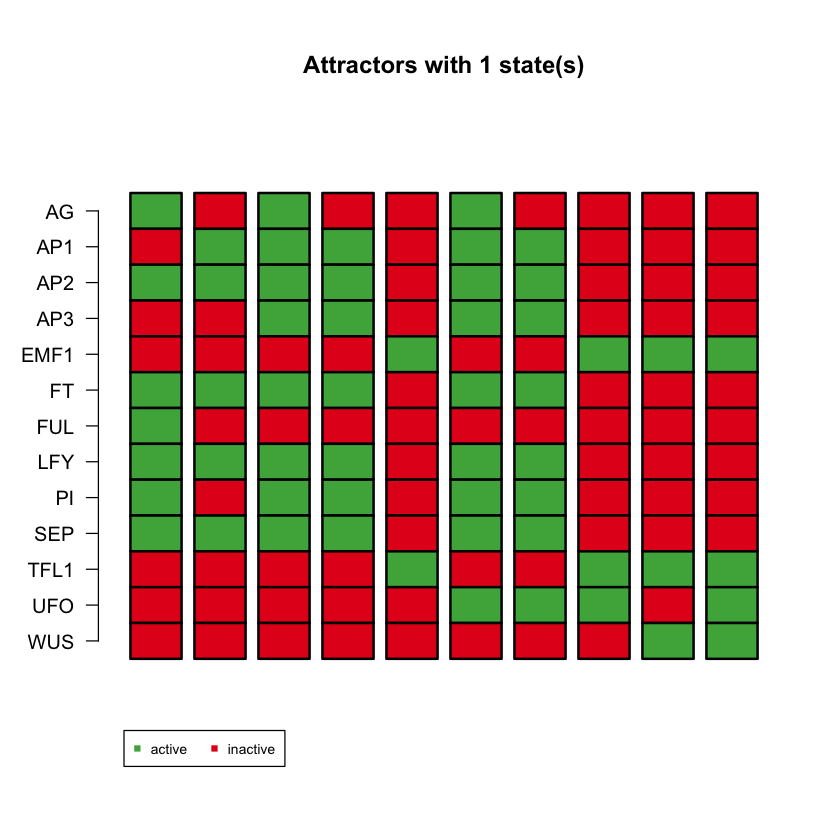

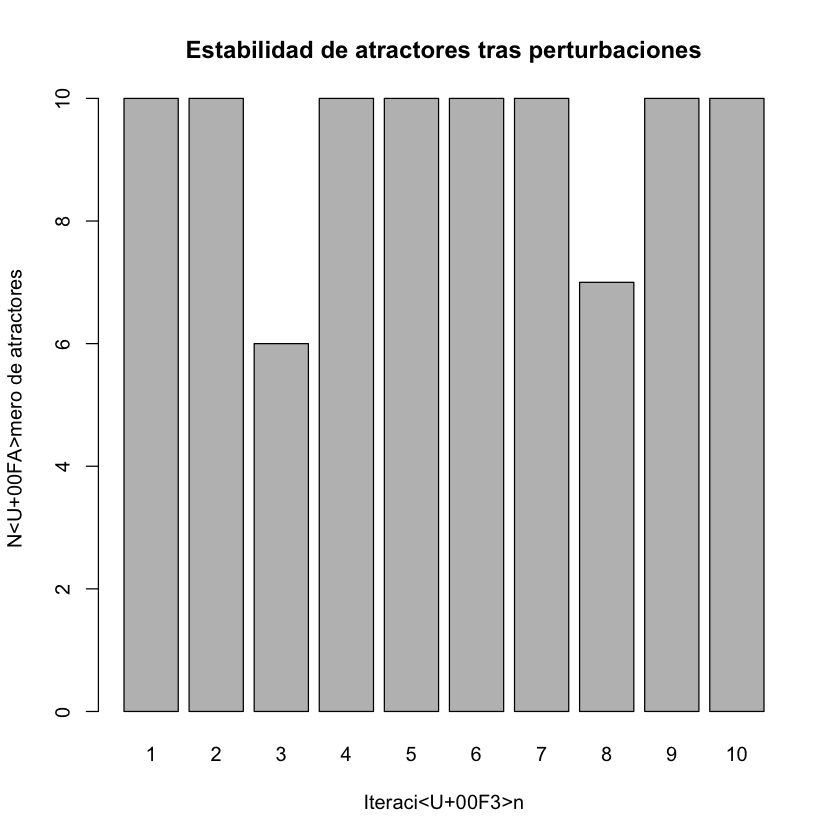

In [10]:
###########################################################
# Parte 5: Análisis de estabilidad frente a perturbaciones

# Perturbaciones aleatorias en las funciones booleanas (5 perturbaciones)
perturb_net <- perturbNetwork(net, perturb = "functions", num = 5)  # Corrección clave

# Comparar atractores antes y después de la perturbación
attr_perturbed <- getAttractors(perturb_net)
print(attr_perturbed)
plotAttractors(attr_perturbed)

# Análisis de estabilidad de atractores frente a perturbaciones
num_perturb <- 10
stability <- sapply(1:num_perturb, function(x) {
  perturbed_net <- perturbNetwork(net, perturb = "functions", num = 5)  # Corrección clave
  length(getAttractors(perturbed_net)$attractors)
})

# Graficar estabilidad de la red
barplot(stability, 
        main = "Estabilidad de atractores tras perturbaciones",
        xlab = "Iteración", 
        ylab = "Número de atractores",
        names.arg = 1:num_perturb)